In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("cleaned_df.csv")

In [3]:
# Turn the dataframe into X and y array
X = df.drop(['Fraud'],axis=1,inplace=False)
X_features = X.columns
X = X.to_numpy()
y = df[['Fraud']].to_numpy().flatten()
print('The shape of X:')
print(X.shape)
print('-----------------------------------------------------')
print('The shape of y:')
print(y.shape)
print('-----------------------------------------------------')

The shape of X:
(11371, 66)
-----------------------------------------------------
The shape of y:
(11371,)
-----------------------------------------------------


In [4]:
# Split the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=192,test_size=0.2)

# Fit the MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Split the train datasets into train and validation datasets
# X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,random_state=192,test_size=0.25)


# SMOTE

In [5]:
# TODO draw the plot after resampling the data
import imblearn
from collections import Counter
import matplotlib.pyplot as plt

### Oversampling
We will successively try to oversample the minority class to 10%, 30%,50% of the size of all datasets.

In [6]:
# k_neighbors set to 20 to make sure that the result is more general 
over = imblearn.over_sampling.SMOTE(sampling_strategy=0.1, random_state = 483, k_neighbors=20)  
X_over_synth_10, y_over_synth_10 = over.fit_resample(X_train, y_train)
over = imblearn.over_sampling.SMOTE(sampling_strategy=0.5, random_state = 483, k_neighbors=20)
X_over_synth_30, y_over_synth_30 = over.fit_resample(X_train, y_train)
over = imblearn.over_sampling.SMOTE(sampling_strategy=1, random_state = 483, k_neighbors=20)
X_over_synth_50, y_over_synth_50 = over.fit_resample(X_train, y_train)

In [7]:
print("Percentage of 1 in y_over_synth10:", Counter(y_over_synth_10)[1]/len(y_over_synth_10))
print("Percentage of 1 in y_over_synth30:", Counter(y_over_synth_30)[1]/len(y_over_synth_30))
print("Percentage of 1 in y_over_synth50:", Counter(y_over_synth_50)[1]/len(y_over_synth_50))

Percentage of 1 in y_over_synth10: 0.09090909090909091
Percentage of 1 in y_over_synth30: 0.3333333333333333
Percentage of 1 in y_over_synth50: 0.5


### Undersampling
We will successively try to undersample the minority class to 10%, 30%,50% of the size of majority class.

In [8]:
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.1, random_state = 483)  
X_under_synth_10, y_under_synth_10 = under.fit_resample(X_train, y_train)
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.5, random_state = 483)
X_under_synth_30, y_under_synth_30 = under.fit_resample(X_train, y_train)
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1, random_state = 483)
X_under_synth_50, y_under_synth_50 = under.fit_resample(X_train, y_train)

In [9]:
print("Percentage of 1 in y_under_synth_10:", Counter(y_under_synth_10)[1]/len(y_under_synth_10))
print("Percentage of 1 in y_under_synth_30:", Counter(y_under_synth_30)[1]/len(y_under_synth_30))
print("Percentage of 1 in y_under_synth_50:", Counter(y_under_synth_50)[1]/len(y_under_synth_50))

Percentage of 1 in y_under_synth_10: 0.09090909090909091
Percentage of 1 in y_under_synth_30: 0.3333333333333333
Percentage of 1 in y_under_synth_50: 0.5


In [10]:
X_over_synth_50.shape

(18020, 66)

In [11]:
X_under_synth_50.shape

(172, 66)

In [12]:
X_train.shape

(9096, 66)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_over_synth_50,y_over_synth_50,random_state=192,test_size=0.25)


In [14]:
X_test?

Type:            ndarray
String form:    
[[0.12290745 0.02234087 0.2626613  ... 0.         1.         0.        ]
           [0.76476711 0.48883641  <...>  0.         0.        ]
           [0.32127678 0.03811326 0.00878207 ... 0.         0.         0.        ]]
Length:          2275
File:            /opt/anaconda3/envs/smm768/lib/python3.7/site-packages/numpy/__init__.py
Docstring:       <no docstring>
Class docstring:
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiati

In [15]:
## 2.9 Show the data structure of the data
print('-----------------------------------------------------')
print('Shape of X_train:')
print(X_train.shape)
print('-----------------------------------------------------')
print('Shape of y_train:')
print(y_train.shape)
print('-----------------------------------------------------')
print('Shape of X_val:')
print(X_val.shape)
print('-----------------------------------------------------')
print('Shape of y_val:')
print(y_val.shape)
print('-----------------------------------------------------')
print('Shape of X_test:')
print(X_test.shape)
print('-----------------------------------------------------')
print('Shape of y_test:')
print(y_test.shape)
print('-----------------------------------------------------')



-----------------------------------------------------
Shape of X_train:
(13515, 66)
-----------------------------------------------------
Shape of y_train:
(13515,)
-----------------------------------------------------
Shape of X_val:
(4505, 66)
-----------------------------------------------------
Shape of y_val:
(4505,)
-----------------------------------------------------
Shape of X_test:
(2275, 66)
-----------------------------------------------------
Shape of y_test:
(2275,)
-----------------------------------------------------


# Question 10 - Testing with models

### Model 1 - Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

from sklearn import tree # for decision tree models


In [17]:
# X_trainvalid = np.stack(X_train, X_val)
# X_trainvalid.shape

In [18]:
X_train?

Type:            ndarray
String form:    
[[0.48694596 0.01314974 0.00270604 ... 1.         0.         0.        ]
           [0.92098187 0.49278133  <...>  0.         0.        ]
           [0.3580536  0.03548605 0.01080398 ... 1.         0.         0.        ]]
Length:          13515
File:            /opt/anaconda3/envs/smm768/lib/python3.7/site-packages/numpy/__init__.py
Docstring:       <no docstring>
Class docstring:
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiat

In [19]:
print(X_train.shape)
print(X_val.shape)

(13515, 66)
(4505, 66)


In [20]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=300)

In [21]:
predlr = lr.predict(X_train)
print("Accuracy Score: {}".format(accuracy_score(y_train, predlr)*100))
print("f1_Score: {}".format(f1_score(y_train, predlr)*100))
print(confusion_matrix(y_train, predlr))

Accuracy Score: 92.83758786533481
f1_Score: 93.18789584799437
[[5926  795]
 [ 173 6621]]


In [22]:
predlr = lr.predict(X_val)
print("Accuracy Score: {}".format(accuracy_score(y_val, predlr)*100))
print("f1_Score: {}".format(f1_score(y_val, predlr)*100))
print(confusion_matrix(y_val, predlr))

Accuracy Score: 92.5860155382908
f1_Score: 92.83876500857633
[[2006  283]
 [  51 2165]]


In [23]:
predlr = lr.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predlr)*100))
print("f1_Score: {}".format(f1_score(y_test, predlr)*100))
print(confusion_matrix(y_test, predlr))

Accuracy Score: 86.72527472527473
f1_Score: 10.119047619047619
[[1956  293]
 [   9   17]]


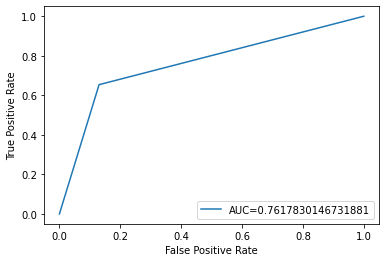

In [24]:
fpr, tpr, _ = roc_curve(y_test,  predlr)
auc = roc_auc_score(y_test, predlr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [25]:
auc

0.7617830146731881

### Model 2 - Decision Tree

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# preddtc = dtc.predict(X_test)
# print("Accuracy Score: {}".format(accuracy_score(y_test, preddtc)*100))
# print("f1_Score: {}".format(f1_score(y_test, preddtc)*100))
# print(confusion_matrix(y_test, preddtc))
# print(classification_report(y_test, preddtc))

In [28]:
preddtc = dtc.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, preddtc)*100))
print("f1_Score: {}".format(f1_score(y_test, preddtc)*100))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

Accuracy Score: 96.65934065934067
f1_Score: 15.555555555555555
[[2192   57]
 [  19    7]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2249
           1       0.11      0.27      0.16        26

    accuracy                           0.97      2275
   macro avg       0.55      0.62      0.57      2275
weighted avg       0.98      0.97      0.97      2275



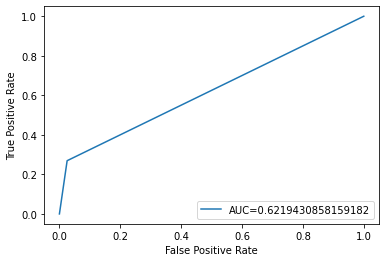

In [29]:
fpr, tpr, _ = roc_curve(y_test,  preddtc)
auc = roc_auc_score(y_test, preddtc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

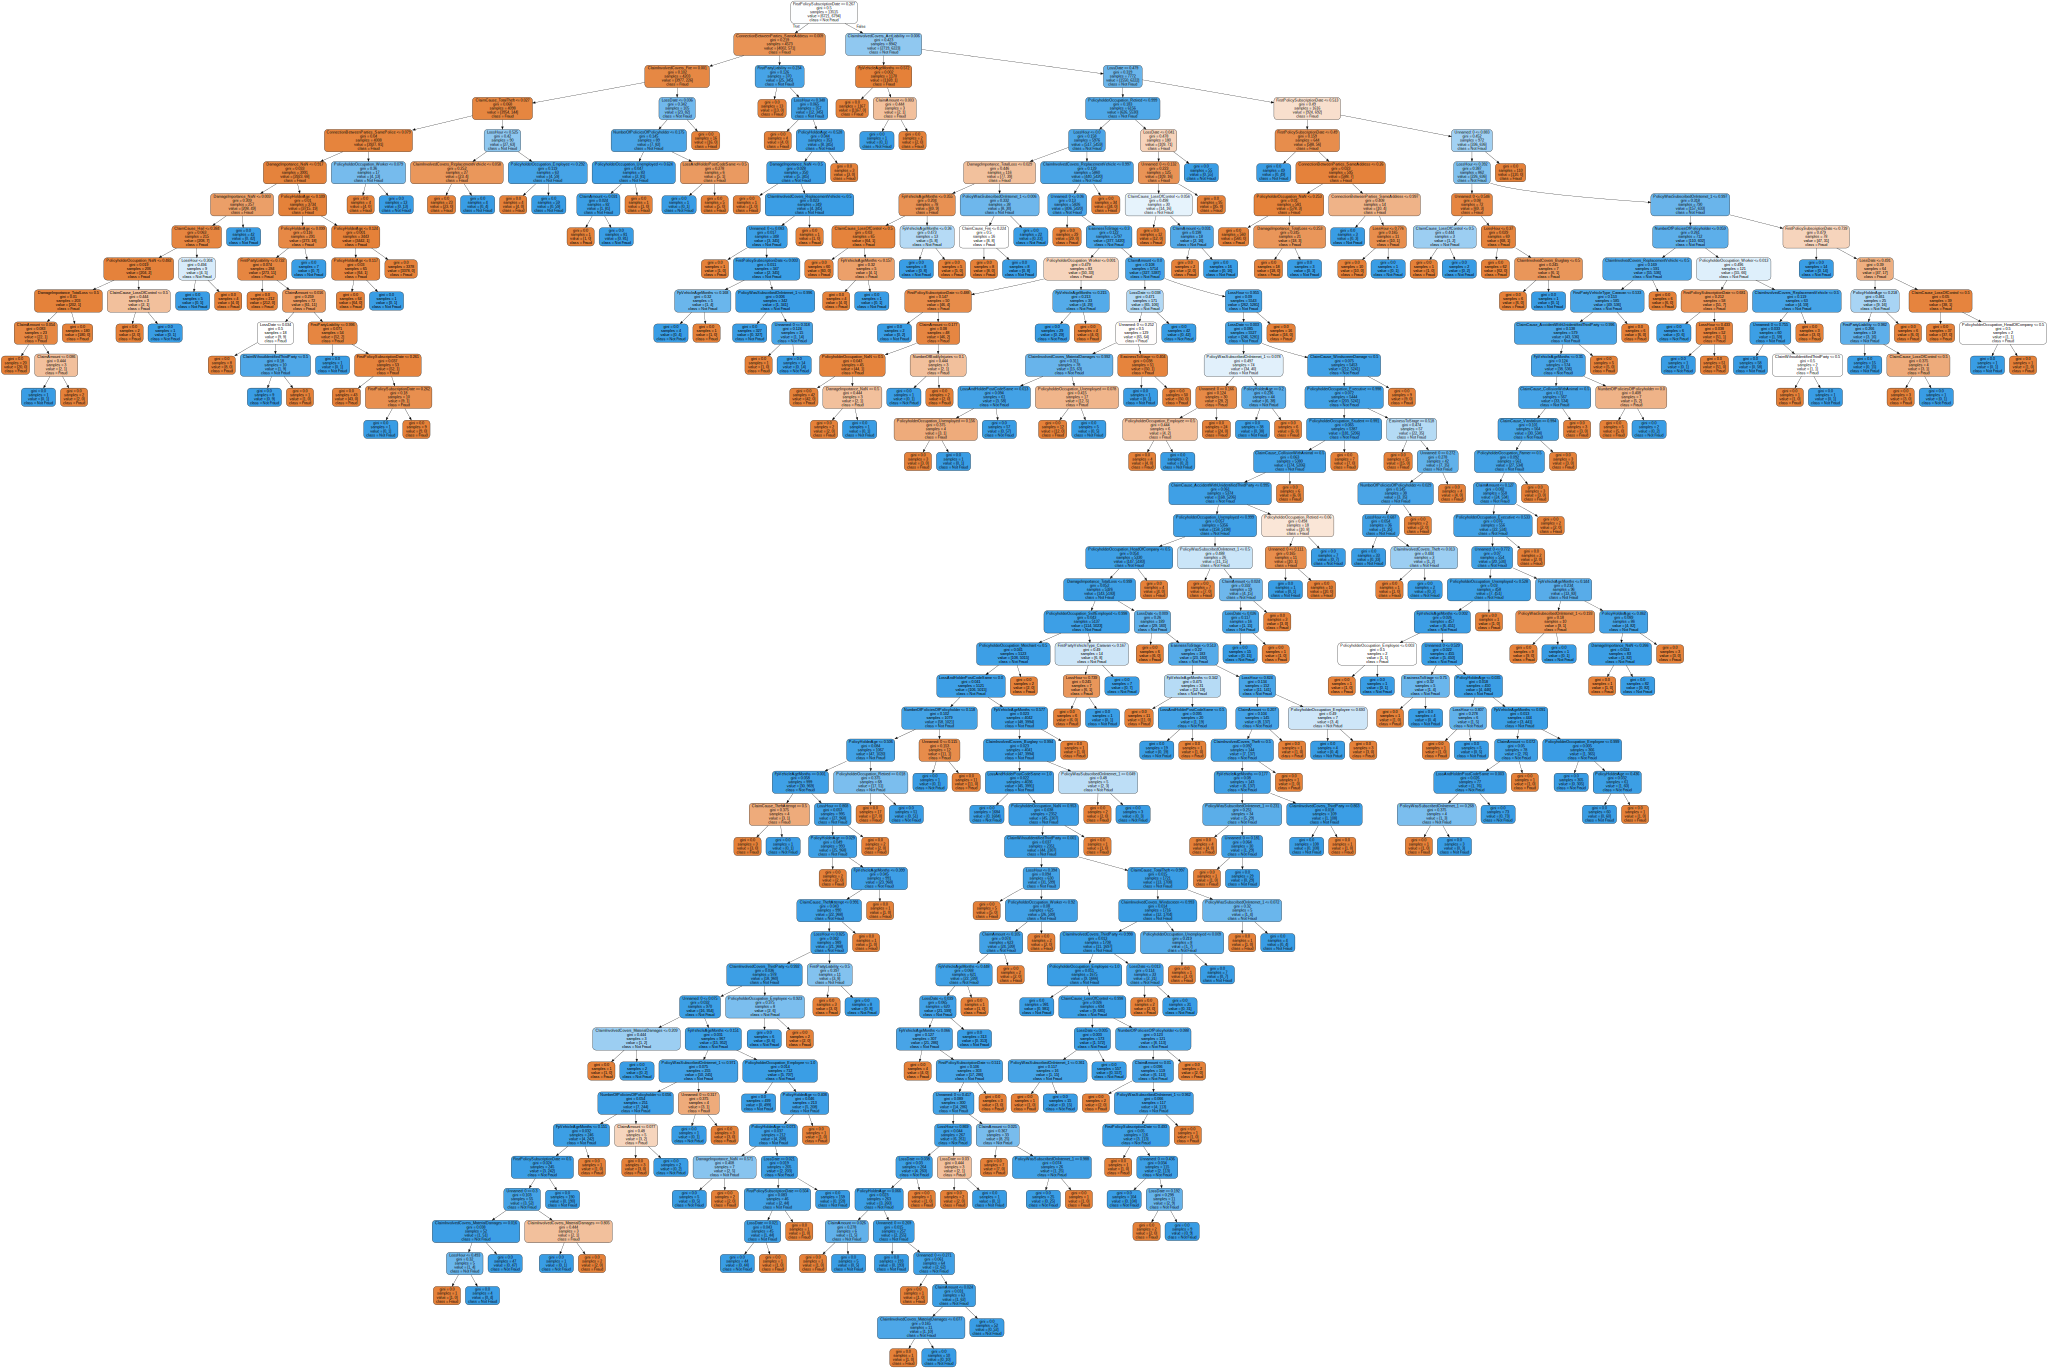

In [30]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, feature_names = X_features, filled = True, rounded = True, class_names=["Fraud","Not Fraud"])
graph = graphviz.Source(dot_data)
graph

In [38]:

n_max_leaf_nodes = range(2,60) # Lets train the models with 2, 3, 4, ... 60 leafs
train_array = []
validation_array = []

for n in n_max_leaf_nodes:
    
    classifier_DT = DecisionTreeClassifier(max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)
    
    y_train_pred = classifier_DT.predict(X_train)
    y_validation_pred = classifier_DT.predict(X_val)
    
    train_score = accuracy_score(y_train,y_train_pred)
    validation_score = accuracy_score(y_val,y_validation_pred)

    train_array.append([n,train_score])
    validation_array.append([n,validation_score])

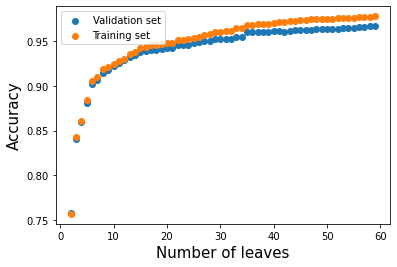

In [39]:
array = pd.DataFrame(validation_array)
plt.scatter(array[0],array[1])

array_train = pd.DataFrame(train_array)
plt.scatter(array_train[0],array_train[1])
plt.legend(['Validation set','Training set'])
plt.xlabel("Number of leaves",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

# 30 leaves

In [40]:

n_max_leaf_nodes = range(2,60) # Lets train the models with 2, 3, 4, ... 60 leafs
train_array = []
validation_array = []

for n in n_max_leaf_nodes:
    
    classifier_DT = DecisionTreeClassifier(min_samples_leaf = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)
    
    y_train_pred = classifier_DT.predict(X_train)
    y_validation_pred = classifier_DT.predict(X_val)
    
    train_score = accuracy_score(y_train,y_train_pred)
    validation_score = accuracy_score(y_val,y_validation_pred)

    train_array.append([n,train_score])
    validation_array.append([n,validation_score])

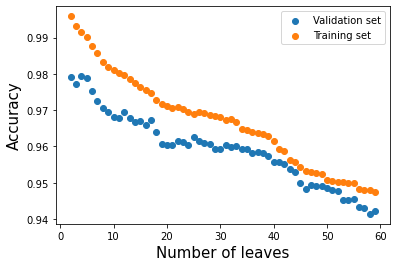

In [41]:
array = pd.DataFrame(validation_array)
plt.scatter(array[0],array[1])

array_train = pd.DataFrame(train_array)
plt.scatter(array_train[0],array_train[1])
plt.legend(['Validation set','Training set'])
plt.xlabel("Number of leaves",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

In [31]:
# X_features

### Model 2.1 TDS Cart

In [32]:
# pip install plotly

In [33]:
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs


In [34]:
from sklearn import tree # for decision tree models

### Model 3 - Random Forest

In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
predrfc = rfc.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predrfc)*100))
print("f1_Score: {}".format(f1_score(y_test, predrfc)*100))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

Accuracy Score: 98.5934065934066
f1_Score: 0.0
[[2243    6]
 [  26    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2249
           1       0.00      0.00      0.00        26

    accuracy                           0.99      2275
   macro avg       0.49      0.50      0.50      2275
weighted avg       0.98      0.99      0.98      2275



In [37]:
X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'gini', 'best', 
                                                       mdepth=3, 
                                                       clweight=None, 
                                                       minleaf=1000)

NameError: name 'fitting' is not defined

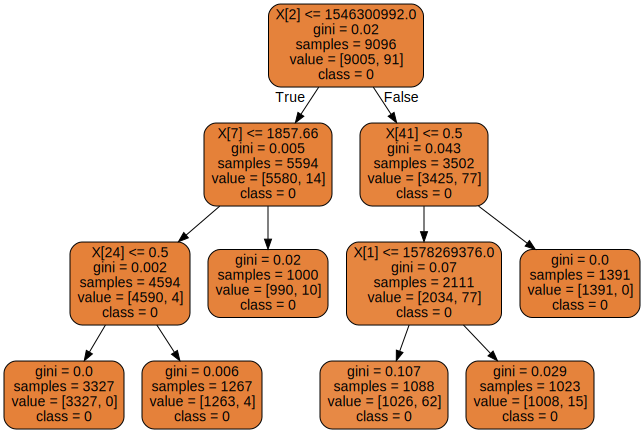

In [ ]:
graph